In [1]:
# create a functio to print hello
function hello()
    println("hello")
end

hello (generic function with 1 method)

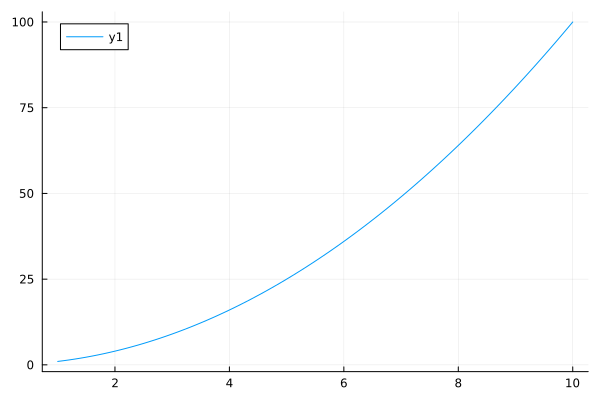

In [2]:
# define a function to plot a graph
using Plots

# plot a graph of y = x^2
function plot_graph()
    x = 1:0.1:10
    y = x.^2
    plot(x, y)
end

# call the functions
plot_graph()

# Set up

## Get Asset Price Data

I will use AlphaVantage to get asset price data.

To interact with the API, I will need to install an HTTP client package in Julia. One popular package is HTTP.jl, which provides a simple and flexible interface for making HTTP requests.

I  install it by running the following command in the Julia REPL:
```
using Pkg
Pkg.add("HTTP")
```

In [3]:
using Pkg
Pkg.add("HTTP")
Pkg.add("JSON")
Pkg.add("DataFrames")
Pkg.add("Dates")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


I need to make an HTTP request to the API to retrieve the data. Parse it using JSON.jl, and then convert it to a DataFrame using DataFrames.jl.

In [5]:
using HTTP
using JSON
using DataFrames
using Dates

api_key = "5OCY34XT90XG8JYD"


endpoint = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=VOO&apikey=$api_key&outputsize=full"

# Get today's date as a string in YYYY-MM-DD format
today = Dates.format(now(), "yyyy-mm-dd")

# Set the start date to January 1st, 2022
start_date = "2022-01-01"

# Modify the endpoint URL to include the start and end dates
endpoint *= "&start_date=$start_date&end_date=$today"

response = HTTP.get(endpoint)

if response.status == 200
    # Handle the response data here
    data = String(response.body)
else
    error("API request failed with status code: $(response.status)")
end

data = JSON.parse(data)



Dict{String, Any} with 2 entries:
  "Time Series (Daily)" => Dict{String, Any}("2012-05-16"=>Dict{String, Any}("6…
  "Meta Data"           => Dict{String, Any}("1. Information"=>"Daily Time Seri…

The output you have is a nested dictionary that contains the daily time series data for the VOO ETF. To make it more readable, you can use the println() function to print the dictionary contents to the console in a more user-friendly way.


In [6]:
# Print the time series data
for (key, value) in data["Time Series (Daily)"]
    println("Date: $key")
    println("Open: $(value["1. open"])")
    println("High: $(value["2. high"])")
    println("Low: $(value["3. low"])")
    println("Close: $(value["4. close"])")
    println("Adjusted Close: $(value["5. adjusted close"])")
    println("Volume: $(value["6. volume"])")
    println("Split Coefficient: $(value["8. split coefficient"])")
    println("Dividend Amount: $(value["7. dividend amount"])")
    println("=========================================")
end

Date: 2012-05-16
Open: 61.26
High: 61.51
Low: 60.75
Close: 60.75
Adjusted Close: 98.5012219482217
Volume: 662600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-07-08
Open: 272.79
High: 273.06
Low: 272.03
Close: 272.6
Adjusted Close: 256.265697415872
Volume: 3131845
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-02-06
Open: 250.75
High: 251.22
Low: 249.95
Close: 250.79
Adjusted Close: 233.24990292266
Volume: 2052224
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-05-22
Open: 219.26
High: 220.05
Low: 219.2341
Close: 219.93
Adjusted Close: 197.801656489365
Volume: 1859933
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-10-26
Open: 244.34
High: 246.98
Low: 241.04
Close: 243.76
Adjusted Close: 225.465489143596
Volume: 5278769
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2010-09-14
Open: 51.42
High: 51.74
Low: 51.19
Close: 51.519
Adjusted Close: 80.6514878447686
Volume: 118800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-02-27
Op

Date: 2018-07-12
Open: 255.66
High: 256.66
Low: 255.01
Close: 256.57
Adjusted Close: 236.243738060824
Volume: 2874031
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-03-13
Open: 172.14
High: 172.24
Low: 169.2101
Close: 169.72
Adjusted Close: 142.910234504643
Volume: 1659400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-11-21
Open: 164.0
High: 164.95
Low: 163.88
Close: 164.83
Adjusted Close: 138.040110000327
Volume: 2121600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-12-24
Open: 65.27
High: 65.27
Low: 65.11
Close: 65.18
Adjusted Close: 107.563605951502
Volume: 515800
Split Coefficient: 1.0
Dividend Amount: 0.4700
Date: 2015-11-17
Open: 188.86
High: 189.79
Low: 187.834
Close: 188.29
Adjusted Close: 164.07786057853
Volume: 1879921
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-07-23
Open: 274.71
High: 275.5
Low: 273.89
Close: 275.49
Adjusted Close: 258.982527443502
Volume: 1752997
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-04-1

Date: 2017-10-30
Open: 236.13
High: 236.615
Low: 235.5327
Close: 235.86
Adjusted Close: 214.178881121265
Volume: 1292843
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-08-10
Open: 191.9
High: 193.15
Low: 191.9
Close: 193.09
Adjusted Close: 167.374964988621
Volume: 1346730
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-03-18
Open: 71.0
High: 71.59
Low: 70.9307
Close: 71.27
Adjusted Close: 117.61365750481
Volume: 1639000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-09-20
Open: 66.84
High: 67.18
Low: 66.65
Close: 67.15
Adjusted Close: 109.458216493486
Volume: 897000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-08-05
Open: 177.04
High: 177.48
Low: 175.4
Close: 175.97
Adjusted Close: 149.522903256917
Volume: 1251300
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-01-18
Open: 208.01
High: 208.22
Low: 207.42
Close: 208.16
Adjusted Close: 186.35096495402
Volume: 1980467
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-06-21
Ope

Date: 2021-03-03
Open: 354.7
High: 355.64
Low: 350.56
Close: 350.66
Adjusted Close: 338.8466428163
Volume: 6317636
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-07-09
Open: 271.4
High: 273.22
Low: 271.34
Close: 272.94
Adjusted Close: 256.585324477946
Volume: 2532925
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-02-26
Open: 169.59
High: 170.04
Low: 168.91
Close: 169.31
Adjusted Close: 142.565000023457
Volume: 709000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-02-02
Open: 175.86
High: 176.09
Low: 173.8
Close: 174.37
Adjusted Close: 152.845070432023
Volume: 5101178
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-12-17
Open: 341.77
High: 342.25
Low: 340.96
Close: 342.01
Adjusted Close: 329.139568519977
Volume: 2626995
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-05-13
Open: 262.87
High: 263.9
Low: 256.36
Close: 258.74
Adjusted Close: 246.676429974345
Volume: 5599664
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-02-23


Dividend Amount: 0.0000
Date: 2017-11-28
Open: 239.59
High: 241.48
Low: 239.44
Close: 241.42
Adjusted Close: 219.227785467208
Volume: 1793519
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-05-01
Open: 172.5
High: 173.03
Low: 172.03
Close: 172.6
Adjusted Close: 146.001587397051
Volume: 623900
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-03-07
Open: 70.87
High: 70.974
Low: 70.78
Close: 70.9
Adjusted Close: 117.003063239666
Volume: 908600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-10-31
Open: 279.35
High: 279.35
Low: 277.15
Close: 278.55
Adjusted Close: 263.108423266336
Volume: 2312685
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-10-11
Open: 272.1
High: 274.35
Low: 271.94
Close: 272.13
Adjusted Close: 257.044319596008
Volume: 2810997
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-06-23
Open: 223.12
High: 223.65
Low: 222.72
Close: 223.37
Adjusted Close: 201.803917987922
Volume: 1257512
Split Coefficient: 1.0
Dividend Amount: 1.

Adjusted Close: 105.317875914283
Volume: 1610800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-01-23
Open: 207.84
High: 208.21
Low: 206.83
Close: 207.65
Adjusted Close: 185.894397928047
Volume: 4586317
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-04-28
Open: 267.48
High: 267.79
Low: 262.3
Close: 262.68
Adjusted Close: 250.432730252999
Volume: 5836500
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-03-28
Open: 60.19
High: 60.32
Low: 59.884
Close: 59.9
Adjusted Close: 95.1248408438174
Volume: 332200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-02-12
Open: 69.51
High: 69.7438
Low: 69.43
Close: 69.59
Adjusted Close: 114.841229490104
Volume: 819000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-05-08
Open: 171.96
High: 173.1965
Low: 171.4325
Close: 171.98
Adjusted Close: 145.477132100491
Volume: 1390700
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-06-05
Open: 192.48
High: 193.02
Low: 191.58
Close: 192.3
Adjusted Close: 

Adjusted Close: 177.474356989177
Volume: 1140677
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-06-21
Open: 384.5
High: 388.38
Low: 383.65
Close: 388.18
Adjusted Close: 376.403607194418
Volume: 4389779
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-04-05
Open: 243.9
High: 244.89
Low: 242.8
Close: 243.99
Adjusted Close: 223.620521612426
Volume: 3436604
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-08-23
Open: 76.29
High: 76.4
Low: 75.93
Close: 76.3
Adjusted Close: 127.15611633209
Volume: 848800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-10-25
Open: 417.64
High: 419.14
Low: 415.93
Close: 418.75
Adjusted Close: 408.757259749792
Volume: 2511465
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-09-26
Open: 197.47
High: 197.6
Low: 196.5
Close: 196.71
Adjusted Close: 175.00495732412
Volume: 2451578
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-02-25
Open: 177.7
High: 179.31
Low: 176.83
Close: 179.31
Adjusted Close: 157.17525

Adjusted Close: 105.464580895436
Volume: 386800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-01-15
Open: 168.63
High: 169.43
Low: 168.59
Close: 169.2
Adjusted Close: 142.472376138261
Volume: 943100
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-06-03
Open: 285.2
High: 287.93
Low: 284.93
Close: 287.02
Adjusted Close: 273.637894918593
Volume: 5502257
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-09-13
Open: 53.55
High: 54.03
Low: 53.19
Close: 53.82
Adjusted Close: 85.8894103910765
Volume: 387000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-05-17
Open: 76.01
High: 76.4898
Low: 75.91
Close: 76.44
Adjusted Close: 126.739079585732
Volume: 1321400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-12-26
Open: 65.3
High: 65.34
Low: 64.73
Close: 64.87
Adjusted Close: 107.052026972597
Volume: 779200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-06-08
Open: 380.5
High: 382.23
Low: 377.26
Close: 377.99
Adjusted Close: 371.52721280

Volume: 6322478
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-02-12
Open: 250.38
High: 252.36
Low: 250.34
Close: 252.0
Adjusted Close: 234.375276273018
Volume: 5980510
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-03-09
Open: 62.81
High: 63.07
Low: 62.739
Close: 62.91
Adjusted Close: 101.556550974076
Volume: 305800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-06-13
Open: 177.73
High: 178.07
Low: 177.1727
Close: 177.92
Adjusted Close: 150.501752199787
Volume: 731200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-01-10
Open: 300.74
High: 300.86
Low: 298.79
Close: 299.26
Adjusted Close: 284.038884805444
Volume: 3666750
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-02-16
Open: 173.2
High: 174.01
Low: 172.05
Close: 174.01
Adjusted Close: 152.529510270553
Volume: 2360977
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-10-20
Open: 315.48
High: 318.67
Low: 314.7792
Close: 315.41
Adjusted Close: 303.540572810403
Volume: 30665

Volume: 7083981
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-11-23
Open: 202.14
High: 202.71
Low: 201.7724
Close: 202.69
Adjusted Close: 180.325122261329
Volume: 1465781
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-01-05
Open: 187.26
High: 187.41
Low: 184.66
Close: 185.09
Adjusted Close: 158.886795391599
Volume: 2734710
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-11-08
Open: 58.05
High: 58.51
Low: 57.51
Close: 58.42
Adjusted Close: 93.7519290763535
Volume: 271400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-12-01
Open: 335.92
High: 337.8
Low: 335.32
Close: 336.3
Adjusted Close: 323.644445756756
Volume: 3181534
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-06-05
Open: 58.48
High: 59.11
Low: 58.4455
Close: 58.97
Adjusted Close: 95.6150956096566
Volume: 504600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-03-28
Open: 363.54
High: 364.2
Low: 361.682
Close: 363.52
Adjusted Close: 363.52
Volume: 2413653
Split Coeffi

Volume: 5876639
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-08-26
Open: 76.4
High: 76.63
Low: 75.98
Close: 76.06
Adjusted Close: 126.756149517939
Volume: 1408000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-09-01
Open: 177.11
High: 178.5
Low: 174.83
Close: 175.58
Adjusted Close: 152.196884109493
Volume: 8531696
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-09-17
Open: 67.25
High: 67.35
Low: 66.99
Close: 67.18
Adjusted Close: 109.50711815387
Volume: 676800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-02-15
Open: 408.18
High: 410.29
Low: 407.46
Close: 410.1
Adjusted Close: 401.755197389722
Volume: 6822294
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-11-05
Open: 282.58
High: 282.82
Low: 281.71
Close: 281.96
Adjusted Close: 266.329387988426
Volume: 3002411
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-09-29
Open: 179.93
High: 181.45
Low: 179.77
Close: 181.14
Adjusted Close: 154.654440791355
Volume: 1482872
Split C

Volume: 2070921
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-03-09
Open: 390.88
High: 394.85
Low: 388.72
Close: 392.9
Adjusted Close: 384.905186672572
Volume: 5812598
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-11-23
Open: 328.28
High: 329.6
Low: 326.06
Close: 328.42
Adjusted Close: 316.06098386986
Volume: 2222635
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-06-02
Open: 192.45
High: 193.48
Low: 191.92
Close: 193.48
Adjusted Close: 170.504880215969
Volume: 1601670
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-02-11
Open: 359.71
High: 360.1
Low: 356.8376
Close: 359.22
Adjusted Close: 347.11826564898
Volume: 2237200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-08-23
Open: 409.25
High: 412.08
Low: 409.23
Close: 411.22
Adjusted Close: 400.096465407161
Volume: 3259398
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-02-15
Open: 254.03
High: 255.0
Low: 253.81
Close: 254.98
Adjusted Close: 237.146856921009
Volume: 280655

Close: 202.14
Adjusted Close: 179.835809432656
Volume: 2641345
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-01-26
Open: 59.22
High: 59.47
Low: 59.12
Close: 59.37
Adjusted Close: 93.8641184254744
Volume: 218400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-01-25
Open: 209.98
High: 210.77
Low: 209.79
Close: 210.71
Adjusted Close: 188.633800083886
Volume: 2872970
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-04-27
Open: 194.63
High: 194.74
Low: 193.0
Close: 193.21
Adjusted Close: 166.704968880561
Volume: 898239
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-01-20
Open: 60.04
High: 60.17
Low: 59.89
Close: 60.14
Adjusted Close: 97.0848986739935
Volume: 690400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-04-24
Open: 62.62
High: 62.96
Low: 62.6
Close: 62.79
Adjusted Close: 101.808917302532
Volume: 938600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-03-09
Open: 367.35
High: 368.88
Low: 358.85
Close: 359.84
Adjusted Close

Low: 167.37
Close: 168.61
Adjusted Close: 141.975575299481
Volume: 917200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-06-12
Open: 75.21
High: 75.26
Low: 74.0
Close: 74.09
Adjusted Close: 122.842731639285
Volume: 2116600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-11-30
Open: 203.53
High: 203.692
Low: 202.31
Close: 202.4
Adjusted Close: 180.067120951665
Volume: 2360118
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-02-13
Open: 165.7
High: 167.84
Low: 165.7
Close: 167.72
Adjusted Close: 141.226163864711
Volume: 1336600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-11-17
Open: 237.17
High: 237.39
Low: 236.79
Close: 236.9
Adjusted Close: 215.123280495326
Volume: 1370465
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-05-02
Open: 219.29
High: 219.38
Low: 218.77
Close: 219.2
Adjusted Close: 197.145105726681
Volume: 2573012
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-02-14
Open: 69.47
High: 69.8199
Low: 69.38
Close: 69

Date: 2020-07-27
Open: 295.48
High: 297.12
Low: 294.74
Close: 296.97
Adjusted Close: 284.574829110314
Volume: 2253331
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-04-04
Open: 235.87
High: 242.81
Low: 235.7
Close: 242.24
Adjusted Close: 222.016620170474
Volume: 4598042
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-08-16
Open: 64.57
High: 65.05
Low: 64.43
Close: 64.93
Adjusted Close: 105.839493625049
Volume: 1264800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-09-12
Open: 265.61
High: 266.26
Low: 264.83
Close: 265.71
Adjusted Close: 244.659639241304
Volume: 3019831
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-03-05
Open: 70.38
High: 70.84
Low: 70.37
Close: 70.64
Adjusted Close: 116.573996999295
Volume: 1065000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-12-07
Open: 339.07
High: 339.63
Low: 337.91
Close: 339.18
Adjusted Close: 326.416066344861
Volume: 1943081
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-03-29
Op

Date: 2020-04-06
Open: 236.96
High: 245.3
Low: 235.93
Close: 243.53
Adjusted Close: 232.175585497613
Volume: 7577273
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-10-30
Open: 278.69
High: 279.69
Low: 277.38
Close: 279.45
Adjusted Close: 263.958531257503
Volume: 1818128
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-05-24
Open: 189.13
High: 191.01
Low: 189.08
Close: 190.63
Adjusted Close: 167.993308432759
Volume: 1985569
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-12-14
Open: 241.65
High: 242.63
Low: 238.77
Close: 239.38
Adjusted Close: 221.414213944839
Volume: 5088580
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-10-17
Open: 234.47
High: 234.69
Low: 234.22
Close: 234.66
Adjusted Close: 213.089189535809
Volume: 1332411
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-10-23
Open: 80.08
High: 80.1
Low: 79.6861
Close: 79.97
Adjusted Close: 133.944883779969
Volume: 1896400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-03-

Dividend Amount: 0.0000
Date: 2020-09-11
Open: 308.55
High: 309.59
Low: 304.17
Close: 306.98
Adjusted Close: 294.167023740729
Volume: 3690254
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-07-30
Open: 258.6
High: 258.78
Low: 256.64
Close: 257.1
Adjusted Close: 236.731749836059
Volume: 1601425
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-03-02
Open: 219.99
High: 220.02
Low: 218.75
Close: 218.86
Adjusted Close: 195.929920204828
Volume: 1650696
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-03-02
Open: 62.98
High: 63.028
Low: 62.6765
Close: 62.83
Adjusted Close: 101.427405781294
Volume: 285600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-08-02
Open: 227.31
High: 227.42
Low: 226.2873
Close: 227.28
Adjusted Close: 205.336412590299
Volume: 1889733
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-06-11
Open: 255.79
High: 256.67
Low: 255.7
Close: 255.9
Adjusted Close: 234.536216568793
Volume: 2648046
Split Coefficient: 1.0
Dividend Amoun

Volume: 11167600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-01-07
Open: 184.73
High: 185.91
Low: 184.23
Close: 185.56
Adjusted Close: 159.290257457805
Volume: 2305552
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-10-01
Open: 273.44
High: 274.08
Low: 269.09
Close: 269.32
Adjusted Close: 254.390093534696
Volume: 3728498
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-04-13
Open: 402.57
High: 408.2
Low: 402.48
Close: 407.47
Adjusted Close: 400.503170461377
Volume: 4358710
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-10-11
Open: 254.81
High: 256.29
Low: 248.45
Close: 250.22
Adjusted Close: 231.440657587424
Volume: 9037039
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-06-08
Open: 192.17
High: 192.3194
Low: 191.02
Close: 191.11
Adjusted Close: 164.893052133762
Volume: 1130127
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-11-14
Open: 187.2
High: 187.53
Low: 186.85
Close: 187.33
Adjusted Close: 159.939363991634
Volume: 1

Low: 56.49
Close: 57.71
Adjusted Close: 92.0973220674289
Volume: 761000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-02-18
Open: 192.28
High: 192.78
Low: 192.0
Close: 192.74
Adjusted Close: 165.453784341546
Volume: 1862895
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-09-01
Open: 416.05
High: 416.59
Low: 415.16
Close: 415.49
Adjusted Close: 404.250961558342
Volume: 3256370
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-08-04
Open: 198.5
High: 198.9
Low: 198.05
Close: 198.57
Adjusted Close: 175.862483493891
Volume: 1384742
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-05-11
Open: 365.97
High: 371.36
Low: 360.27
Close: 360.93
Adjusted Close: 354.758900813863
Volume: 8026944
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-07-10
Open: 222.2
High: 222.99
Low: 222.04
Close: 222.57
Adjusted Close: 201.081156943958
Volume: 1800233
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-07-29
Open: 58.98
High: 59.68
Low: 58.72
Close: 5

Date: 2016-07-11
Open: 195.62
High: 196.41
Low: 195.41
Close: 195.85
Adjusted Close: 173.453529698739
Volume: 3590480
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-01-22
Open: 169.06
High: 169.08
Low: 168.49
Close: 168.84
Adjusted Close: 142.169243423073
Volume: 751200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2010-09-20
Open: 51.87
High: 52.52
Low: 51.73
Close: 52.52
Adjusted Close: 82.2185240708719
Volume: 38000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-09-16
Open: 196.02
High: 196.19
Low: 195.17
Close: 195.89
Adjusted Close: 174.275436379553
Volume: 1774206
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-10-27
Open: 312.18
High: 312.47
Low: 310.5583
Close: 310.77
Adjusted Close: 299.075184085124
Volume: 2196107
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-03-17
Open: 58.57
High: 58.7
Low: 58.121
Close: 58.44
Adjusted Close: 92.393786100467
Volume: 352400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-06-02
Open

Date: 2012-08-15
Open: 64.38
High: 64.59
Low: 64.34
Close: 64.49
Adjusted Close: 105.122269272746
Volume: 426000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-03-04
Open: 171.17
High: 172.23
Low: 171.13
Close: 171.88
Adjusted Close: 144.72903079577
Volume: 1281500
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-05-18
Open: 249.53
High: 249.85
Low: 248.89
Close: 249.26
Adjusted Close: 228.450556240474
Volume: 1703135
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-03-29
Open: 422.96
High: 424.72
Low: 420.25
Close: 424.29
Adjusted Close: 417.035585920577
Volume: 5510554
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-03-07
Open: 254.48
High: 254.6
Low: 251.95
Close: 252.85
Adjusted Close: 235.16582780013
Volume: 6441203
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-10-13
Open: 320.84
High: 337.675
Low: 319.87
Close: 336.22
Adjusted Close: 333.256826366837
Volume: 6396891
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-10-10


Date: 2021-04-12
Open: 377.7
High: 378.65
Low: 377.0799
Close: 378.42
Adjusted Close: 366.939700743242
Volume: 2747529
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-06-07
Open: 75.04
High: 75.53
Low: 74.71
Close: 75.47
Adjusted Close: 125.130799795071
Volume: 2929200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-11-08
Open: 195.31
High: 197.18
Low: 195.0233
Close: 196.58
Adjusted Close: 174.889301564616
Volume: 3048785
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-05-21
Open: 250.77
High: 251.68
Low: 250.43
Close: 251.09
Adjusted Close: 230.1277788912
Volume: 1263289
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-08-06
Open: 406.44
High: 407.18
Low: 406.17
Close: 406.86
Adjusted Close: 395.854403763333
Volume: 2486923
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-08-24
Open: 53.16
High: 54.04
Low: 53.03
Close: 54.0
Adjusted Close: 86.1766659442239
Volume: 302000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-10-21
Op

Date: 2018-01-11
Open: 252.47
High: 253.73
Low: 252.33
Close: 253.73
Adjusted Close: 231.517135608028
Volume: 2280293
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-12-17
Open: 164.33
High: 164.36
Low: 163.31
Close: 163.64
Adjusted Close: 137.043521206415
Volume: 1479800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-04-04
Open: 61.05
High: 61.13
Low: 60.76
Close: 60.93
Adjusted Close: 96.7605434493121
Volume: 157600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-06-23
Open: 390.35
High: 391.14
Low: 389.7
Close: 389.82
Adjusted Close: 377.99385377023
Volume: 2404155
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-07-25
Open: 77.03
High: 77.43
Low: 76.9299
Close: 77.33
Adjusted Close: 128.872640576153
Volume: 628400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-06-20
Open: 254.97
High: 255.37
Low: 254.32
Close: 254.71
Adjusted Close: 233.445563588266
Volume: 1578179
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-12-06
Ope

Dividend Amount: 0.0000
Date: 2017-01-05
Open: 207.75
High: 208.04
Low: 207.013
Close: 207.8
Adjusted Close: 186.028682347451
Volume: 2771884
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-02-04
Open: 301.5
High: 303.23
Low: 301.16
Close: 302.43
Adjusted Close: 287.047650643956
Volume: 2284256
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-11-06
Open: 162.21
High: 162.59
Low: 161.73
Close: 162.33
Adjusted Close: 135.946436063538
Volume: 1510400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-03-01
Open: 257.81
High: 258.21
Low: 256.33
Close: 257.83
Adjusted Close: 239.797529688382
Volume: 2867054
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-09-18
Open: 184.65
High: 185.06
Low: 184.43
Close: 185.04
Adjusted Close: 157.229743812354
Volume: 740000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-12-20
Open: 166.44
High: 167.65
Low: 166.44
Close: 167.18
Adjusted Close: 140.008163500908
Volume: 1303500
Split Coefficient: 1.0
Dividend Amo

Volume: 1557541
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-01-09
Open: 252.18
High: 252.94
Low: 251.91
Close: 252.3
Adjusted Close: 230.212325361233
Volume: 2129810
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-02-28
Open: 397.18
High: 402.85
Low: 396.0
Close: 401.36
Adjusted Close: 393.193040781124
Volume: 11855942
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-07-06
Open: 190.71
High: 192.49
Low: 189.97
Close: 192.38
Adjusted Close: 170.380342320365
Volume: 2197838
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-03-08
Open: 385.76
High: 392.74
Low: 381.64
Close: 382.7
Adjusted Close: 374.912738456588
Volume: 9356075
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-12-08
Open: 190.35
High: 190.83
Low: 188.85
Close: 189.5
Adjusted Close: 161.792075355867
Volume: 1527759
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-06-27
Open: 178.79
High: 179.56
Low: 178.69
Close: 179.48
Adjusted Close: 152.50537407826
Volume: 103230

Adjusted Close: 162.088739023403
Volume: 1740140
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-11-28
Open: 247.72
High: 252.33
Low: 246.75
Close: 252.33
Adjusted Close: 233.392299292761
Volume: 3723260
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-04-29
Open: 267.98
High: 271.0
Low: 266.91
Close: 269.45
Adjusted Close: 256.887083777488
Volume: 6756461
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-01-11
Open: 427.68
High: 431.95
Low: 424.78
Close: 431.78
Adjusted Close: 422.994048107618
Volume: 7207946
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-09-19
Open: 277.0
High: 277.98
Low: 276.23
Close: 276.53
Adjusted Close: 259.96021022161
Volume: 2269251
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-03-31
Open: 371.78
High: 376.34
Low: 371.65
Close: 376.07
Adjusted Close: 376.07
Volume: 4159844
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-09-11
Open: 274.15
High: 275.84
Low: 273.5
Close: 275.84
Adjusted Close: 259.3115

High: 432.76
Low: 429.3
Close: 430.71
Adjusted Close: 420.431855156616
Volume: 4942933
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-07-24
Open: 258.84
High: 259.57
Low: 257.82
Close: 258.68
Adjusted Close: 238.186577392422
Volume: 2916394
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-07-19
Open: 62.99
High: 63.2
Low: 62.78
Close: 63.0
Adjusted Close: 102.693486806994
Volume: 1033000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-07-25
Open: 276.41
High: 276.41
Low: 274.68
Close: 275.41
Adjusted Close: 258.907321075955
Volume: 1874216
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-08-12
Open: 189.88
High: 191.76
Low: 188.3
Close: 191.49
Adjusted Close: 165.988047261231
Volume: 3758708
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-02-10
Open: 373.0
High: 375.39
Low: 372.2
Close: 375.02
Adjusted Close: 373.491966248767
Volume: 3256705
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-03-21
Open: 187.18
High: 187.94
Low: 18

Date: 2013-06-25
Open: 72.59
High: 72.88
Low: 72.11
Close: 72.63
Adjusted Close: 121.039957132368
Volume: 3041400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-11-01
Open: 55.77
High: 56.45
Low: 55.58
Close: 55.8
Adjusted Close: 89.5473749137372
Volume: 614200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-01-20
Open: 58.54
High: 58.69
Low: 58.1606
Close: 58.588
Adjusted Close: 92.6277744704682
Volume: 206800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-11-20
Open: 164.34
High: 164.82
Low: 163.08
Close: 163.55
Adjusted Close: 136.968148944691
Volume: 1468000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-10-21
Open: 415.38
High: 417.24
Low: 414.9449
Close: 417.01
Adjusted Close: 407.058781822712
Volume: 2579450
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-09-30
Open: 52.28
High: 52.7395
Low: 51.69
Close: 51.76
Adjusted Close: 83.0640165866494
Volume: 366600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-07-21
Open: 

Date: 2020-12-04
Open: 337.5045
High: 339.84
Low: 337.45
Close: 339.81
Adjusted Close: 327.022358348508
Volume: 2907285
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-04-17
Open: 191.53
High: 191.77
Low: 189.75
Close: 190.59
Adjusted Close: 164.444387034554
Volume: 2059232
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-09-11
Open: 227.85
High: 229.01
Low: 227.84
Close: 228.87
Adjusted Close: 206.772900165178
Volume: 2007238
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-01-11
Open: 67.35
High: 67.36
Low: 67.13
Close: 67.36
Adjusted Close: 111.161161351536
Volume: 1125000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-01-04
Open: 345.02
High: 345.09
Low: 335.37
Close: 339.03
Adjusted Close: 327.608444972367
Volume: 5402614
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-12-16
Open: 434.56
High: 434.8
Low: 427.35
Close: 428.84
Adjusted Close: 418.606479453375
Volume: 7159519
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-10

Dividend Amount: 0.0000
Date: 2023-02-17
Open: 373.179
High: 374.45
Low: 371.32
Close: 374.22
Adjusted Close: 372.695225880256
Volume: 3285327
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2023-03-23
Open: 364.48
High: 368.286
Low: 360.12
Close: 362.64
Adjusted Close: 361.162409046058
Volume: 4787193
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-04-03
Open: 230.43
High: 232.71
Low: 225.34
Close: 228.02
Adjusted Close: 217.388728309308
Volume: 5489369
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-08-05
Open: 193.04
High: 193.75
Low: 192.31
Close: 192.64
Adjusted Close: 166.984894377793
Volume: 1369652
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-12-11
Open: 288.45
High: 289.08
Low: 288.08
Close: 288.79
Adjusted Close: 272.780763076952
Volume: 1825172
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-11-25
Open: 192.15
High: 192.3099
Low: 191.67
Close: 191.96
Adjusted Close: 167.275936675631
Volume: 758701
Split Coefficient: 1.0
Dividen

Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-05-15
Open: 219.88
High: 220.72
Low: 219.83
Close: 220.52
Adjusted Close: 198.332293407151
Volume: 1441009
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-06-28
Open: 60.52
High: 60.82
Low: 60.07
Close: 60.77
Adjusted Close: 99.0584633850952
Volume: 343400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-05-24
Open: 383.69
High: 386.4
Low: 383.44
Close: 385.32
Adjusted Close: 373.630372312209
Volume: 2962453
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-07-31
Open: 63.36
High: 63.53
Low: 63.03
Close: 63.03
Adjusted Close: 102.742388467378
Volume: 1363200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-02-09
Open: 418.55
High: 420.87
Low: 418.345
Close: 420.57
Adjusted Close: 412.012151587895
Volume: 6284459
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-05-22
Open: 251.67
High: 251.94
Low: 250.1
Close: 250.37
Adjusted Close: 229.467888012226
Volume: 1055352
Split Coefficient: 1

Volume: 1750000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-01-08
Open: 251.16
High: 251.88
Low: 250.87
Close: 251.77
Adjusted Close: 229.728724360672
Volume: 2476193
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-04-15
Open: 255.08
High: 256.9
Low: 253.11
Close: 255.24
Adjusted Close: 243.339615005998
Volume: 4877384
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-07-13
Open: 344.74
High: 351.0
Low: 344.37
Close: 348.36
Adjusted Close: 343.80628095217
Volume: 5603536
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-07-16
Open: 256.89
High: 257.01
Low: 256.16
Close: 256.63
Adjusted Close: 236.298984676888
Volume: 993457
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-05-04
Open: 257.92
High: 260.9
Low: 256.53
Close: 260.64
Adjusted Close: 248.487843814305
Volume: 4119615
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-08-11
Open: 200.31
High: 200.89
Low: 199.995
Close: 200.67
Adjusted Close: 177.722337526913
Volume: 164512

Close: 214.73
Adjusted Close: 193.124856535995
Volume: 2647442
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-11-11
Open: 427.7
High: 427.82
Low: 426.39
Close: 426.4
Adjusted Close: 416.224705808504
Volume: 3634631
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-07-20
Open: 62.65
High: 62.74
Low: 62.37
Close: 62.42
Adjusted Close: 101.748054706231
Volume: 1213800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-11-15
Open: 164.5
High: 165.0
Low: 164.32
Close: 165.0
Adjusted Close: 138.182479828028
Volume: 710300
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-09-03
Open: 184.65
High: 184.68
Low: 183.59
Close: 183.86
Adjusted Close: 156.227089804039
Volume: 627600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-12-23
Open: 57.48
High: 57.84
Low: 57.38
Close: 57.8
Adjusted Close: 93.3074017851151
Volume: 512800
Split Coefficient: 1.0
Dividend Amount: 0.3430
Date: 2021-09-15
Open: 408.79
High: 412.2578
Low: 407.7
Close: 411.82
Adjusted Clo

Low: 174.69
Close: 176.88
Adjusted Close: 154.135068134953
Volume: 2561648
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-07-18
Open: 77.09
High: 77.53
Low: 77.07
Close: 77.36
Adjusted Close: 128.922636427922
Volume: 865400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-02-24
Open: 168.87
High: 170.566
Low: 168.78
Close: 169.37
Adjusted Close: 142.615522142655
Volume: 978600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-12-03
Open: 65.37
High: 65.41
Low: 64.7001
Close: 64.77
Adjusted Close: 106.121778484063
Volume: 813800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-03-21
Open: 64.55
High: 64.62
Low: 64.3
Close: 64.43
Adjusted Close: 104.010309636937
Volume: 324200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-07-10
Open: 255.75
High: 256.3
Low: 255.45
Close: 256.14
Adjusted Close: 235.847803979028
Volume: 1314531
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-02-09
Open: 61.95
High: 62.01
Low: 61.57
Close: 61.87
Adj

High: 270.41
Low: 269.46
Close: 269.84
Adjusted Close: 252.364424558104
Volume: 1892536
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-06-03
Open: 252.83
High: 253.96
Low: 250.77
Close: 252.12
Adjusted Close: 235.792020158572
Volume: 3825614
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-08-20
Open: 64.99
High: 65.07
Low: 64.79
Close: 65.06
Adjusted Close: 106.051400820048
Volume: 576200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-09-12
Open: 52.51
High: 53.38
Low: 52.1805
Close: 53.3799
Adjusted Close: 85.187070563631
Volume: 322600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-07-03
Open: 223.09
High: 223.53
Low: 222.47
Close: 222.55
Adjusted Close: 201.063087917859
Volume: 1762460
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-05-06
Open: 187.21
High: 188.7199
Low: 187.0
Close: 188.65
Adjusted Close: 166.248426983371
Volume: 1551415
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-07-05
Open: 191.73
High: 191.82
Low

Open: 55.17
High: 55.55
Low: 54.71
Close: 55.52
Adjusted Close: 88.6023795041354
Volume: 257400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-08-21
Open: 268.58
High: 268.93
Low: 267.92
Close: 268.56
Adjusted Close: 252.467775854756
Volume: 2012417
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-12-22
Open: 207.16
High: 207.24
Low: 206.5
Close: 207.01
Adjusted Close: 185.321451071924
Volume: 1863775
Split Coefficient: 1.0
Dividend Amount: 1.2960
Date: 2013-08-12
Open: 77.17
High: 77.55
Low: 77.14
Close: 77.45
Adjusted Close: 129.072623983229
Volume: 661000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-12-02
Open: 188.71
High: 190.13
Low: 188.71
Close: 189.92
Adjusted Close: 162.15066465217
Volume: 1446793
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-06-01
Open: 59.17
High: 59.378
Low: 58.62
Close: 58.65
Adjusted Close: 95.0962414364314
Volume: 1283600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-06-04
Open: 254.48
High: 257.76

Date: 2014-09-24
Open: 181.62
High: 183.07
Low: 181.12
Close: 182.99
Adjusted Close: 156.233941263167
Volume: 968285
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-07-13
Open: 60.41
High: 60.91
Low: 60.1599
Close: 60.29
Adjusted Close: 96.2146516625418
Volume: 259400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-10-24
Open: 64.95
High: 65.0499
Low: 64.46
Close: 64.56
Adjusted Close: 105.777706020243
Volume: 731200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-02-27
Open: 193.77
High: 194.05
Low: 193.19
Close: 193.2
Adjusted Close: 165.848662108471
Volume: 966523
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-05-29
Open: 75.75
High: 75.92
Low: 75.26
Close: 75.62
Adjusted Close: 125.379502855483
Volume: 1762400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-01-21
Open: 169.22
High: 169.28
Low: 167.71
Close: 168.74
Adjusted Close: 142.085039891077
Volume: 1366400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-04-19
Open: 

Date: 2022-03-22
Open: 411.2
High: 415.52
Low: 411.2
Close: 414.67
Adjusted Close: 406.232206051198
Volume: 4180514
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-09-04
Open: 176.88
High: 177.69
Low: 175.64
Close: 176.49
Adjusted Close: 152.985693566947
Volume: 2317653
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-11-16
Open: 62.22
High: 62.54
Low: 61.69
Close: 62.39
Adjusted Close: 102.222290560764
Volume: 806800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-11-30
Open: 251.64
High: 253.94
Low: 251.35
Close: 253.48
Adjusted Close: 234.455990269604
Volume: 2992752
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-12-12
Open: 244.94
High: 245.58
Low: 244.69
Close: 245.1
Adjusted Close: 222.569506329272
Volume: 1854983
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-07-28
Open: 226.54
High: 226.92
Low: 226.09
Close: 226.77
Adjusted Close: 204.875652424771
Volume: 2364130
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-04-28
O

Date: 2015-03-19
Open: 192.56
High: 192.85
Low: 191.745
Close: 192.11
Adjusted Close: 164.912973486845
Volume: 1371972
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-09-23
Open: 177.99
High: 178.45
Low: 176.85
Close: 177.43
Adjusted Close: 154.614343844328
Volume: 1670250
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-06-15
Open: 191.26
High: 191.96
Low: 190.36
Close: 190.52
Adjusted Close: 167.89637057446
Volume: 1590761
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-06-29
Open: 223.81
High: 223.92
Low: 220.4191
Close: 221.69
Adjusted Close: 200.286119795597
Volume: 4613043
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-08-30
Open: 414.66
High: 416.56
Low: 414.39
Close: 415.76
Adjusted Close: 404.513658036286
Volume: 2811785
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-09-17
Open: 183.4
High: 185.99
Low: 182.74
Close: 183.09
Adjusted Close: 158.706729192432
Volume: 3106238
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 201

Date: 2012-05-31
Open: 60.27
High: 60.57
Low: 59.63
Close: 60.12
Adjusted Close: 97.4797277946846
Volume: 848200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-04-26
Open: 391.4
High: 391.59
Low: 382.44
Close: 382.54
Adjusted Close: 375.999417940695
Volume: 8351899
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-08-07
Open: 262.2
High: 262.78
Low: 262.08
Close: 262.37
Adjusted Close: 241.584244280385
Volume: 2619229
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-10-17
Open: 195.64
High: 195.9273
Low: 194.81
Close: 195.05
Adjusted Close: 173.528122241216
Volume: 1323208
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2010-10-21
Open: 54.13
High: 54.378
Low: 53.655
Close: 53.96
Adjusted Close: 84.9223996645333
Volume: 58800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-05-12
Open: 192.15
High: 193.07
Low: 191.23
Close: 192.46
Adjusted Close: 166.057855756704
Volume: 1852662
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-08-09
Op

Date: 2016-10-27
Open: 197.04
High: 197.07
Low: 195.65
Close: 195.75
Adjusted Close: 174.150884023164
Volume: 1635461
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-06-12
Open: 193.01
High: 193.22
Low: 192.21
Close: 192.51
Adjusted Close: 166.100996631628
Volume: 2147740
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-05-26
Open: 385.09
High: 385.75
Low: 384.07
Close: 385.21
Adjusted Close: 373.523709432124
Volume: 2642705
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-04-09
Open: 71.66
High: 72.03
Low: 71.4362
Close: 71.77
Adjusted Close: 118.996124304919
Volume: 738000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-07-01
Open: 190.65
High: 190.75
Low: 189.45
Close: 190.27
Adjusted Close: 164.930522494096
Volume: 2782276
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-08-04
Open: 56.94
High: 56.98
Low: 54.92
Close: 55.01
Adjusted Close: 87.7884887702177
Volume: 1008400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-07-27


Dividend Amount: 0.0000
Date: 2019-05-20
Open: 260.9
High: 262.11
Low: 260.02
Close: 260.82
Adjusted Close: 243.928584395363
Volume: 2762623
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-09-29
Open: 306.84
High: 307.51
Low: 304.65
Close: 305.3
Adjusted Close: 293.811029704245
Volume: 2307331
Split Coefficient: 1.0
Dividend Amount: 1.3085
Date: 2010-10-14
Open: 53.85
High: 53.909
Low: 53.4
Close: 53.68
Adjusted Close: 84.4817348775416
Volume: 38200
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-01-05
Open: 438.78
High: 439.41
Low: 430.525
Close: 430.66
Adjusted Close: 421.896838107432
Volume: 7539607
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-10-10
Open: 176.65
High: 177.55
Low: 174.66
Close: 174.7
Adjusted Close: 149.156071581372
Volume: 2469901
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-08-15
Open: 76.66
High: 76.66
Low: 76.075
Close: 76.18
Adjusted Close: 126.956132925014
Volume: 1501400
Split Coefficient: 1.0
Dividend Amount: 0.00

Volume: 5022535
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-10-11
Open: 198.0
High: 198.07
Low: 195.19
Close: 195.96
Adjusted Close: 174.337712557748
Volume: 2642914
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-08-22
Open: 223.72
High: 225.6
Low: 223.69
Close: 225.4
Adjusted Close: 203.637924136982
Volume: 1455556
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-12-19
Open: 66.66
High: 66.66
Low: 66.05
Close: 66.05
Adjusted Close: 108.218982073064
Volume: 3044400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-09-28
Open: 53.85
High: 54.12
Low: 52.536
Close: 52.64
Adjusted Close: 84.4762332519557
Volume: 394600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-03-08
Open: 353.63
High: 356.4
Low: 350.66
Close: 350.96
Adjusted Close: 339.136536139875
Volume: 5663478
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-06-03
Open: 384.17
High: 386.11
Low: 382.7
Close: 385.01
Adjusted Close: 373.329776922878
Volume: 3390955
Split C

Volume: 1979800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-08-30
Open: 55.25
High: 55.96
Low: 54.83
Close: 55.56
Adjusted Close: 88.6662140715014
Volume: 259800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-05-07
Open: 62.45
High: 62.93
Low: 62.43
Close: 62.72
Adjusted Close: 101.695417952139
Volume: 1980600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-06-15
Open: 346.82
High: 352.84
Low: 341.97
Close: 348.52
Adjusted Close: 342.561084176011
Volume: 7887624
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-11-28
Open: 203.07
High: 203.37
Low: 202.345
Close: 202.54
Adjusted Close: 180.191673308054
Volume: 2193035
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-09-13
Open: 369.34
High: 370.53
Low: 360.2801
Close: 361.38
Adjusted Close: 356.656085114523
Volume: 5549174
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-04-01
Open: 261.46
High: 262.78
Low: 261.19
Close: 262.53
Adjusted Close: 245.527840124663
Volume: 3304080


Volume: 4702800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-04-07
Open: 251.92
High: 252.8
Low: 243.46
Close: 243.66
Adjusted Close: 232.299524339294
Volume: 12870939
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-06-23
Open: 289.51
High: 290.43
Low: 287.76
Close: 288.16
Adjusted Close: 274.724743222569
Volume: 2497769
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-03-26
Open: 240.82
High: 243.81
Low: 238.32
Close: 243.53
Adjusted Close: 223.19892466197
Volume: 5528998
Split Coefficient: 1.0
Dividend Amount: 1.0837
Date: 2015-04-23
Open: 192.65
High: 194.26
Low: 192.5
Close: 193.59
Adjusted Close: 167.032839529982
Volume: 956275
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-02-19
Open: 168.42
High: 169.48
Low: 167.574
Close: 167.7
Adjusted Close: 141.209323158312
Volume: 1928100
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-08-07
Open: 306.23
High: 307.6
Low: 305.3216
Close: 307.36
Adjusted Close: 294.531162997428
Volume: 3319

Close: 353.52
Adjusted Close: 350.404358031063
Volume: 8014279
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-08-08
Open: 77.86
High: 77.93
Low: 77.365
Close: 77.77
Adjusted Close: 129.605913068763
Volume: 998000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-11-25
Open: 333.67
High: 333.67
Low: 332.15
Close: 333.19
Adjusted Close: 320.651480468908
Volume: 2256860
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-11-19
Open: 191.3
High: 191.68
Low: 190.9
Close: 191.22
Adjusted Close: 166.631092993927
Volume: 2155036
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-07-08
Open: 75.06
High: 75.29
Low: 74.92
Close: 75.06
Adjusted Close: 125.089621125644
Volume: 1673000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-07-14
Open: 287.79
High: 293.32
Low: 286.63
Close: 293.03
Adjusted Close: 280.799279975066
Volume: 4024306
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-10-22
Open: 254.55
High: 254.86
Low: 252.17
Close: 252.8
Adjuste

Open: 222.04
High: 222.08
Low: 220.92
Close: 221.67
Adjusted Close: 199.366585704531
Volume: 2326169
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-11-06
Open: 192.26
High: 192.83
Low: 191.118
Close: 192.56
Adjusted Close: 167.79878290404
Volume: 2172599
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-06-05
Open: 74.69
High: 74.82
Low: 73.79
Close: 73.85
Adjusted Close: 122.444806742626
Volume: 2244600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-11-27
Open: 239.19
High: 239.53
Low: 238.83
Close: 239.05
Adjusted Close: 217.075644585934
Volume: 2654206
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-03-31
Open: 188.85
High: 189.29
Low: 188.32
Close: 188.56
Adjusted Close: 166.169114190217
Volume: 3007818
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2014-07-28
Open: 181.35
High: 181.6
Low: 180.28
Close: 181.36
Adjusted Close: 154.102822837271
Volume: 485700
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-07-24
Open: 77.79
High

Date: 2010-09-21
Open: 52.51
High: 52.72
Low: 52.14
Close: 52.3599
Adjusted Close: 81.9678922029407
Volume: 38400
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-12-02
Open: 414.42
High: 422.06
Low: 414.03
Close: 420.56
Adjusted Close: 410.524067248651
Volume: 10417672
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-03-01
Open: 61.14
High: 61.15
Low: 59.85
Close: 59.85
Adjusted Close: 94.6229996254782
Volume: 470600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-05-16
Open: 249.08
High: 250.54
Low: 249.07
Close: 250.09
Adjusted Close: 229.211263781514
Volume: 2588718
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2015-12-02
Open: 193.18
High: 193.4462
Low: 190.92
Close: 191.18
Adjusted Close: 166.5962365787
Volume: 1999841
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-07-23
Open: 77.79
High: 77.8068
Low: 77.43
Close: 77.48
Adjusted Close: 129.122619834997
Volume: 2069600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2011-06-29
Ope

Date: 2018-04-25
Open: 241.51
High: 242.63
Low: 239.6
Close: 242.17
Adjusted Close: 221.952464112796
Volume: 2354538
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-09-20
Open: 355.38
High: 356.38
Low: 351.8332
Close: 354.55
Adjusted Close: 349.915366033965
Volume: 3623962
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2010-12-10
Open: 56.74
High: 56.94
Low: 56.61
Close: 56.9
Adjusted Close: 89.5493799279456
Volume: 147800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-01-23
Open: 68.3
High: 68.45
Low: 68.169
Close: 68.37
Adjusted Close: 112.827918669901
Volume: 1625800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2016-03-18
Open: 188.35
High: 188.79
Low: 187.91
Close: 188.45
Adjusted Close: 165.186978969518
Volume: 2623349
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-09-29
Open: 337.15
High: 337.3
Low: 330.53
Close: 333.38
Adjusted Close: 330.44185585086
Volume: 7230121
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-08-08
Open

Date: 2020-08-25
Open: 315.69
High: 316.26
Low: 314.5
Close: 316.2
Adjusted Close: 303.00219202169
Volume: 2890833
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-03-17
Open: 398.64
High: 405.56
Low: 398.3
Close: 405.41
Adjusted Close: 397.160630513941
Volume: 5177527
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2010-09-16
Open: 51.51
High: 51.66
Low: 51.35
Close: 51.63
Adjusted Close: 80.8252550986123
Volume: 119000
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-04-14
Open: 407.72
High: 408.78
Low: 402.34
Close: 402.52
Adjusted Close: 395.637804437415
Volume: 3735679
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2020-11-02
Open: 303.37
High: 305.31
Low: 300.63
Close: 303.31
Adjusted Close: 291.895916867326
Volume: 4080396
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-06-05
Open: 252.66
High: 253.13
Low: 251.87
Close: 252.87
Adjusted Close: 231.759175786442
Volume: 1491157
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2017-04-19
Op

Date: 2017-08-01
Open: 227.3
High: 227.32
Low: 226.68
Close: 227.15
Adjusted Close: 205.218963920654
Volume: 1674501
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2013-03-28
Open: 71.48
High: 71.81
Low: 71.38
Close: 71.64
Adjusted Close: 118.780581652562
Volume: 732800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2022-07-29
Open: 374.73
High: 379.66
Low: 373.93
Close: 378.79
Adjusted Close: 373.838503737147
Volume: 5246413
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2010-10-06
Open: 53.06
High: 53.14
Low: 52.81
Close: 52.968
Adjusted Close: 83.3611872763343
Volume: 553800
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2021-04-29
Open: 386.4
High: 386.74
Low: 382.81
Close: 386.12
Adjusted Close: 374.40610234919
Volume: 4209880
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2012-07-10
Open: 62.23
High: 62.3
Low: 61.16
Close: 61.36
Adjusted Close: 100.020196039319
Volume: 644600
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2019-05-16
Open: 262.4

Excessive output truncated after 524295 bytes.

Dividend Amount: 0.0000
Date: 2020-12-15
Open: 337.64
High: 339.64
Low: 336.24
Close: 339.64
Adjusted Close: 326.858755744349
Volume: 2762601
Split Coefficient: 1.0
Dividend Amount: 0.0000
Date: 2018-08-16
Open: 260.36
High: 261.89
Low: 260.35
